<a href="https://colab.research.google.com/github/PrathameshS26/MyProjects/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [65]:
dataset = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [66]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [67]:
dataset.shape

(4340, 8)

In [68]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [70]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [71]:
print(dataset.fuel.value_counts())

print(dataset.seller_type.value_counts())

print(dataset.transmission.value_counts())

print(dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [72]:
dataset.replace({"fuel": {"Diesel": 0, "Petrol": 1,"CNG": 2,"LPG": 3,"Electric": 4}}, inplace=True)

dataset.replace({"seller_type": {"Individual": 0, "Dealer": 1,"Trustmark Dealer": 2,}}, inplace=True)

dataset.replace({"transmission": {"Manual": 0, "Automatic": 1,}}, inplace=True)

dataset.replace({"owner": {"First Owner": 0, "Second Owner": 1,"Third Owner": 2,"Fourth & Above Owner": 3,"Test Drive Car": 4,}}, inplace=True)

In [73]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [74]:
dataset = dataset.drop(columns="name", axis=1)

<Axes: >

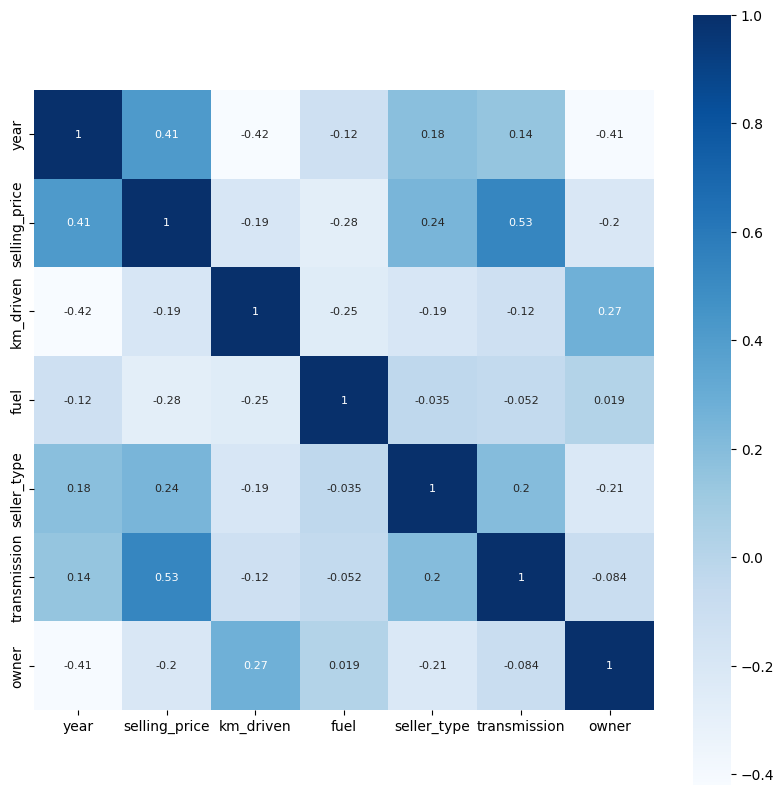

In [75]:
plt.figure(figsize=(10,10))
correlation = dataset.corr()
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={'size': 8}, cmap="Blues")

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
X = dataset.drop(columns="selling_price", axis=1)
y = dataset['selling_price']

In [78]:
print(X)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [79]:
scaler.fit(X)
X = scaler.transform(X)

In [80]:
print(X)

[[-1.44507431  0.08113906  0.86482829 -0.5555905  -0.33927557 -0.63031847]
 [-1.44507431 -0.3476891   0.86482829 -0.5555905  -0.33927557 -0.63031847]
 [-0.2587948   0.7243813  -0.95365755 -0.5555905  -0.33927557 -0.63031847]
 ...
 [-0.97056251  0.35987736  0.86482829 -0.5555905  -0.33927557  0.7205863 ]
 [ 0.69022881  0.50996722 -0.95365755 -0.5555905  -0.33927557 -0.63031847]
 [ 0.69022881 -0.56210318  0.86482829 -0.5555905  -0.33927557 -0.63031847]]


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [82]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3472, 6) (868, 6) (3472,) (868,)


In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
predicted_train_results = model.predict(X_train)

In [85]:
print(sklearn.metrics.r2_score(y_train, predicted_train_results))

0.43922410637048936


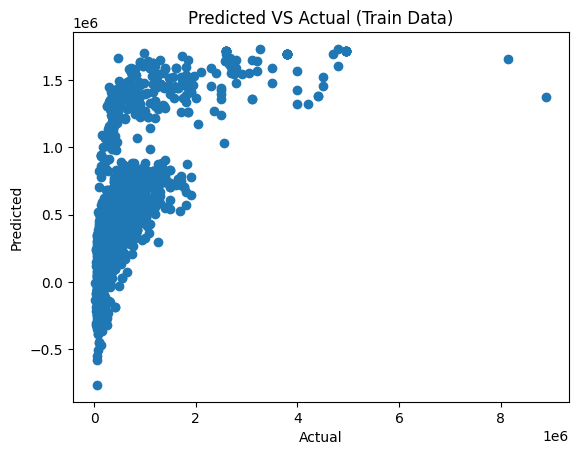

In [86]:
plt.scatter(y_train, predicted_train_results)
plt.title("Predicted VS Actual (Train Data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [87]:
predicted_test_results = model.predict(X_test)

In [91]:
print(sklearn.metrics.r2_score(y_test, predicted_test_results))

0.4998829873054941


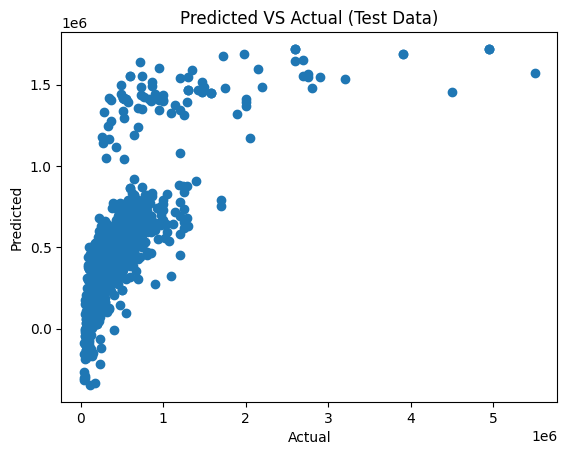

In [92]:
plt.scatter(y_test, predicted_test_results)
plt.title("Predicted VS Actual (Test Data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [90]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [93]:
predicted_train_results = model.predict(X_train)

In [94]:
print(sklearn.metrics.r2_score(y_train, predicted_train_results))

0.4392241063553606


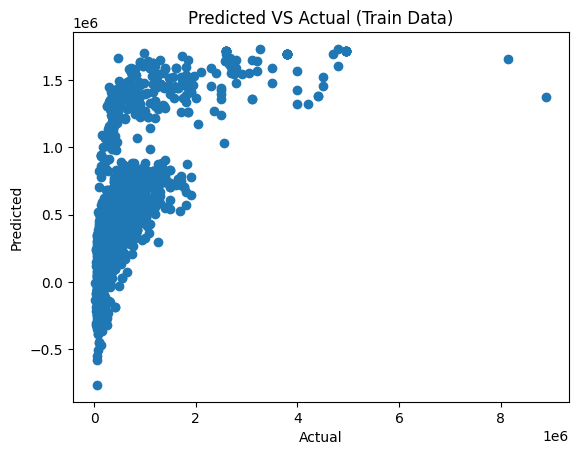

In [95]:
plt.scatter(y_train, predicted_train_results)
plt.title("Predicted VS Actual (Train Data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [96]:
predicted_test_results = model.predict(X_test)

In [97]:
print(sklearn.metrics.r2_score(y_test, predicted_test_results))

0.4998828523562401


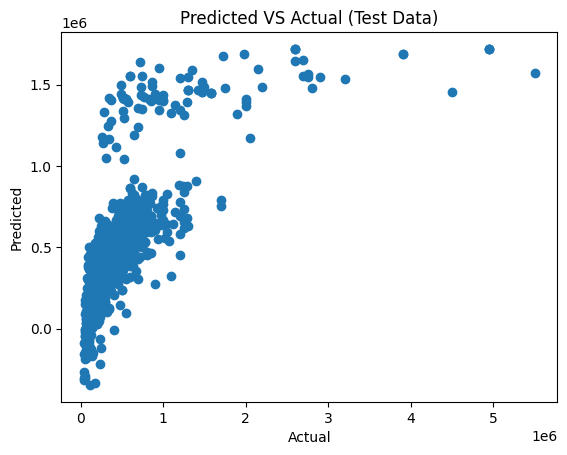

In [98]:
plt.scatter(y_test, predicted_test_results)
plt.title("Predicted VS Actual (Test Data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()